<a href="https://colab.research.google.com/github/rajeshvalluri/TensorFlow/blob/master/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project
## Image classifier for the SVHN dataset
### Instructions

In this notebook, you will create a neural network that classifies real-world images digits. You will use concepts from throughout this course in building, training, testing, validating and saving your Tensorflow classifier model.

This project is peer-assessed. Within this notebook you will find instructions in each section for how to complete the project. Pay close attention to the instructions as the peer review will be carried out according to a grading rubric that checks key parts of the project instructions. Feel free to add extra cells into the notebook as required.

### How to submit

When you have completed the Capstone project notebook, you will submit a pdf of the notebook for peer review. First ensure that the notebook has been fully executed from beginning to end, and all of the cell outputs are visible. This is important, as the grading rubric depends on the reviewer being able to view the outputs of your notebook. Save the notebook as a pdf (you could download the notebook with File -> Download .ipynb, open the notebook locally, and then File -> Download as -> PDF via LaTeX), and then submit this pdf for review.

### Let's get started!

We'll start by running some imports, and loading the dataset. For this project you are free to make further imports throughout the notebook as you wish. 

In [ ]:
import tensorflow as tf
from scipy.io import loadmat

For the capstone project, you will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images.

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

The train and test datasets required for this project can be downloaded from [here](http://ufldl.stanford.edu/housenumbers/train.tar.gz) and [here](http://ufldl.stanford.edu/housenumbers/test.tar.gz). Once unzipped, you will have two files: `train_32x32.mat` and `test_32x32.mat`. You should store these files in Drive for use in this Colab notebook.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [ ]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Load the dataset from your Drive folder

train = loadmat('gdrive/My Drive/train_32x32.mat')
test = loadmat('gdrive/My Drive/test_32x32.mat')

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,Flatten,Dropout, Softmax
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import regularizers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#extracting training data into x_train,y_train respectively
x_train, y_train = train['X'],train['y']
x_test, y_test = test['X'],test['y']
#print(x_train.shape)
#print(x_test.shape)
#We can see that the index is in the wrong axis, so we have to flip it to the front
x_train = np.moveaxis(x_train,-1,0)
x_test = np.moveaxis(x_test,-1,0)
#print(x_train.shape)
#print(x_test.shape)
#print('Testng')
#print(y_test.shape)

In [ ]:
def print_sample_images(x_data,y_data,rnd_numbers):
    #Get a sample of random integers between 0 and the training size
    if rnd_numbers == []:
        rnd_numbers = np.random.randint(0,x_data.shape[0],25)
    #Plotting a total of 25 images in a 5X5 grid
    fig, axes = plt.subplots(rnd_numbers.shape[0]//5,5, figsize=(16, 12))
    fig.subplots_adjust(hspace=0.4, wspace=-0.2)
    for ind in (range(0,rnd_numbers.shape[0])):
        row,col = ind//5,ind%5
        #print(ind,rnd_numbers[ind])
        img = x_data[rnd_numbers[ind]]
        label = y_data[rnd_numbers[ind]][0]%10 #0 is the tenth digit in the labels list
        #print(label)
        axes[row,col].imshow(img)
        axes[row,col].text(10., -1.5, f'Digit {label}')
        axes[row,col].get_xaxis().set_visible(False)
        axes[row,col].get_yaxis().set_visible(False)
    plt.show()
    #print("This image is labelled as",y_train[rnd_numbers[ind]])

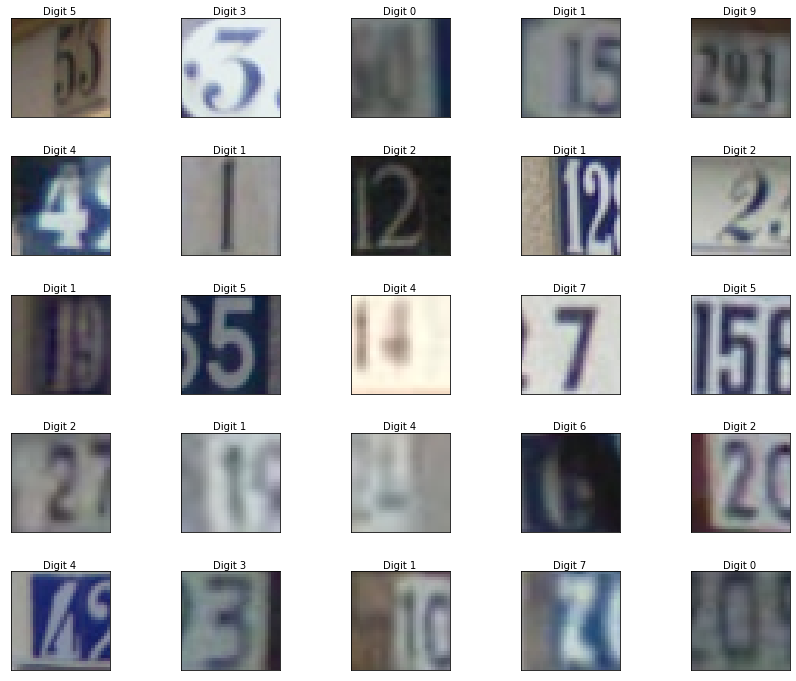

In [ ]:
#Call the print sample images function with a dataset and label set
#it will always show 25 images, assuming there are atleast 25 in the set
#No checks have been included at this time
print_sample_images(x_train,y_train,[])

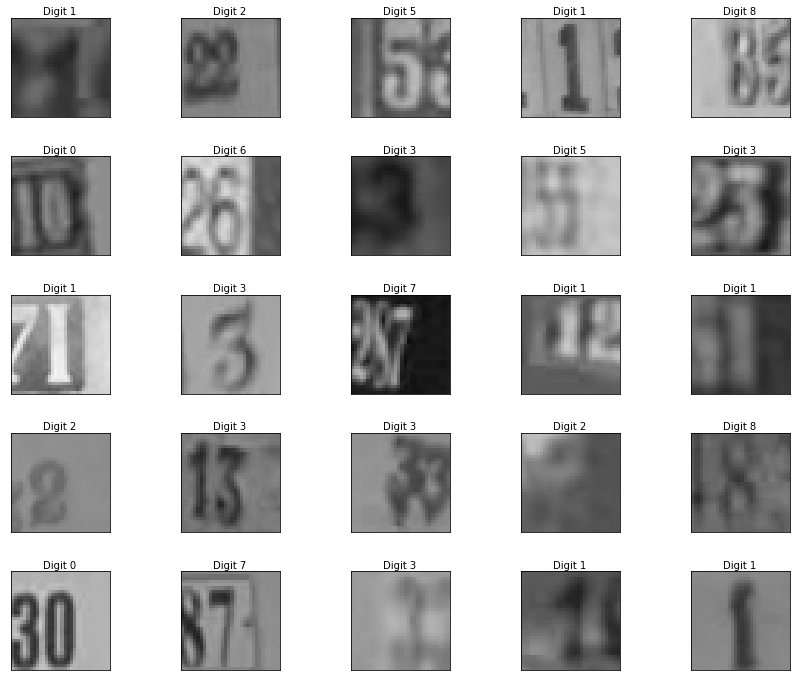

In [ ]:
#Downsampling the color channel in training and testing datasets
avg_pixel_value =  np.mean(x_train,axis=3,keepdims=True).astype(int)
x_train_grayscale = np.concatenate([avg_pixel_value]*3,axis=3)
y_train_grayscale = y_train #This line is unnecessary but I added it for my readability. To emphasize I am not chaning anything here
#print(x_train_grayscale[0][0])
#print(x_train[1,:,:,0])
print_sample_images(x_train_grayscale,y_train_grayscale,[])

## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different MLP architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers._
* Print out the model summary (using the summary() method)
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run. 
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [ ]:
#Building the Multi layer Perceptron network using Sequential model
def get_mlp():
    model =Sequential()
    model.add(Flatten(input_shape=(32,32)))
    model.add(Dense(units=256,activation='relu'))
    model.add(Dense(units=256,activation='relu'))
    model.add(Dense(units=256,activation='relu'))
    model.add(Dense(units=256,activation='relu'))
    model.add(Dense(units=256,activation='relu'))
    model.add(Dense(units=256,activation='relu'))
    model.add(Dense(units=10,activation='softmax'))
    #Compile the model
    opt = tf.keras.optimizers.Adam()
    metrics = 'accuracy'
    loss = 'sparse_categorical_crossentropy'
    model.compile(optimizer=opt,loss=loss,metrics=[metrics])
    return model

In [ ]:
#Calling get_mlp function to create a new simple MLP model
#This model comes compiled as well with Adam optimizer and a few other parameters
model = get_mlp()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               6

In [ ]:
x_train_grayscale = np.mean(x_train,axis=3,keepdims=True)
y_train_grayscale = y_train_grayscale%10

In [ ]:
checkpoints_best_only_path = 'checkpoints_best_only_path_MLP'
checkpoints_best_only = ModelCheckpoint(filepath=checkpoints_best_only_path,
                                   monitor='val_accuracy', save_weights_only=False,)
checkpoints_early_stopping = EarlyStopping(monitor='val_accuracy',patience=10)
callbacks=[checkpoints_best_only,checkpoints_early_stopping]
#avg_pixel_value1 =  np.mean(x_train,axis=3,keepdims=True)
#print(x_train_grayscale.shape)
history = model.fit(x_train_grayscale[:,:,:,0],y_train_grayscale,batch_size=128,
                    validation_split=0.15,epochs=30,callbacks=callbacks)

Epoch 1/30
486/487 [============================>.] - ETA: 0s - loss: 3.1666 - accuracy: 0.3347WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/resource_variable_ops.py:1817: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: checkpoints_best_only_path_MLP/assets
487/487 [==============================] - 8s 16ms/step - loss: 3.1647 - accuracy: 0.3350 - val_loss: 1.4391 - val_accuracy: 0.5220
Epoch 2/30
487/487 [==============================] - 7s 15ms/step - loss: 1.2956 - accuracy: 0.5814 - val_loss: 1.3287 - val_accuracy: 0.5676
Epoch 3/30
487/487 [==============================] - 7s 15ms/step - loss: 1.1396 - accuracy: 0.6405 - val_loss: 1.1833 - val_accuracy: 0.6313
Epoch 4/30
487/487 [==============================] - 7s 

In [ ]:
#plotting the loss and validation loss against Epochs
# Plot the training and validation loss
#Make this a function so we can call it multiple times
def plot_history(history):
    fig, ax = plt.subplots(1,2)
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Loss vs. epochs')
    ax[0].set(ylabel='Loss',xlabel='Epoch')
    ax[0].legend (['Training', 'Validation'])
    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('accuracy vs. epochs')
    ax[1].set(ylabel='accuracy',xlabel='Epoch')
    ax[1].legend (['Training', 'Validation'])

total 16K
drwxr-xr-x 1 root root 4.0K Jul 10 16:29 sample_data
drwx------ 4 root root 4.0K Jul 18 13:43 gdrive
drwxr-xr-x 4 root root 4.0K Jul 18 14:44 checkpoints_best_only_path_CNN
drwxr-xr-x 4 root root 4.0K Jul 18 14:54 checkpoints_best_only_path_MLP


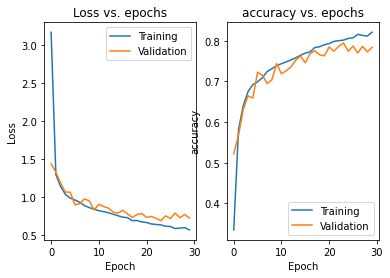

In [ ]:
#Because the kernel has died and its going to take a while to retrain, I am loading the saved model
!ls -lthr 
#model = tf.keras.models.load_model('checkpoints_best_only_path_MLP')
plot_history(history)

In [ ]:
#Evaluate the model on the test data
x_test_grayscale = np.mean(x_test,axis=3,keepdims=True).astype(int)
y_test_grayscale = y_test%10
loss_test, accuracy_test = model.evaluate(x_test_grayscale[:,:,:,0],y_test_grayscale,verbose=False)
loss, accuracy = model.evaluate(x_train_grayscale[:,:,:,0],y_train_grayscale,verbose=False)

In [ ]:
print(f"The model's accuracy on test data is ",accuracy_test)
print(f"The model's loss on test data is ",loss_test)
print(f"The model's accuracy on train data is ",accuracy)
print(f"The model's loss on train data is ",loss)

The model's accuracy on test data is  0.7598724365234375
The model's loss on test data is  0.8770644068717957
The model's accuracy on train data is  0.8203994035720825
The model's loss on train data is  0.5739672780036926


## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different CNN architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 2 or 3 convolutional layers and 2 fully connected layers.)_
* The CNN model should use fewer trainable parameters than your MLP model.
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* You should aim to beat the MLP model performance with fewer parameters!
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [ ]:
#Building the CNN network using Sequential model
def get_CNN(input_shape):
    wd = 1e-5
    rate=0.3 #weight decay and rate
    model =Sequential()
    model.add(Conv2D(input_shape=input_shape,filters=16,activation='relu',
                     kernel_size=(3,3),
                     kernel_initializer='glorot_uniform',
                     bias_initializer='zeros'))
    model.add(Dense(units=64,activation='relu',kernel_regularizer= regularizers.l2(wd)))
    model.add(Conv2D(filters=16,activation='relu',
                     kernel_size=(3,3),
                     kernel_initializer='glorot_uniform',
                     bias_initializer='zeros'))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(Flatten())
    model.add(Dense(units=64,activation='relu',kernel_regularizer= regularizers.l2(wd)))
    model.add(BatchNormalization())
    model.add(Dense(units=32,activation='relu',kernel_regularizer= regularizers.l2(wd)))
    model.add(Dropout(rate))          
    model.add(Dense(units=32,activation='relu',kernel_regularizer= regularizers.l2(wd)))
    model.add(Dense(units=32,activation='relu',kernel_regularizer= regularizers.l2(wd)))
    model.add(Dropout(rate))          
    model.add(Dense(units=10,activation='softmax'))
    #Compile the model
    opt = tf.keras.optimizers.Adam()
    metrics = 'accuracy'
    loss = 'sparse_categorical_crossentropy'
    model.compile(optimizer=opt,loss=loss,metrics=[metrics])
    return model

In [ ]:
print(x_train_grayscale[:,:,:,0].shape)
CNN_model = get_CNN(x_train_grayscale[0,:,:,:].shape)
CNN_model.summary()

(73257, 32, 32)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 16)        160       
_________________________________________________________________
dense_13 (Dense)             (None, 30, 30, 64)        1088      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 16)        9232      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                200768    
_________________________________________________________________
batch_normalization_1 (Batch (None, 64

In [ ]:
checkpoints_best_only_path = 'checkpoints_best_only_path_CNN'
checkpoints_best_only = ModelCheckpoint(filepath=checkpoints_best_only_path,
                                   monitor='val_accuracy', save_weights_only=False,)
checkpoints_early_stopping = EarlyStopping(monitor='val_accuracy',patience=10)
callbacks=[checkpoints_best_only,checkpoints_early_stopping]
history = CNN_model.fit(x_train_grayscale[:,:,:,:],y_train_grayscale,batch_size=128,
                    validation_split=0.15,epochs=30,callbacks=callbacks)

Epoch 1/30
487/487 [==============================] - 153s 314ms/step - loss: 1.7075 - accuracy: 0.3976 - val_loss: 0.9509 - val_accuracy: 0.6992
Epoch 2/30
487/487 [==============================] - 152s 312ms/step - loss: 0.9086 - accuracy: 0.7170 - val_loss: 0.6030 - val_accuracy: 0.8226
Epoch 3/30
487/487 [==============================] - 153s 315ms/step - loss: 0.7168 - accuracy: 0.7883 - val_loss: 0.5633 - val_accuracy: 0.8318
Epoch 4/30
487/487 [==============================] - 153s 313ms/step - loss: 0.6282 - accuracy: 0.8204 - val_loss: 0.5187 - val_accuracy: 0.8508
Epoch 5/30
487/487 [==============================] - 153s 314ms/step - loss: 0.5792 - accuracy: 0.8346 - val_loss: 0.5729 - val_accuracy: 0.8307
Epoch 6/30
487/487 [==============================] - 153s 314ms/step - loss: 0.5506 - accuracy: 0.8439 - val_loss: 0.4683 - val_accuracy: 0.8602
Epoch 7/30
487/487 [==============================] - 154s 317ms/step - loss: 0.5184 - accuracy: 0.8547 - val_loss: 0.4749 -

(26032, 32, 32, 1)


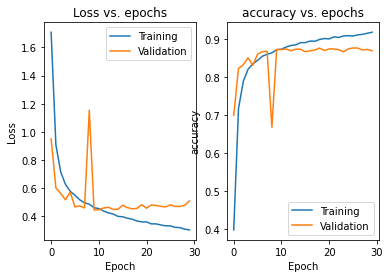

In [ ]:
plot_history(history)
print(x_test_grayscale[:,:,:,:].shape)

In [ ]:
loss_test, accuracy_test = CNN_model.evaluate(x_test_grayscale[:,:,:,:],y_test_grayscale,verbose=False)
loss, accuracy = CNN_model.evaluate(x_train_grayscale[:,:,:,:],y_train_grayscale,verbose=False)

In [ ]:
print(f"The model's accuracy on train data is ",accuracy)
print(f"The model's accuracy on test data is ",accuracy_test)
print(f"The model's loss on train data is ",loss)
print(f"The model's loss on test data is ",loss_test)

The model's accuracy on train data is  0.9251129627227783
The model's accuracy on test data is  0.8571757674217224
The model's loss on train data is  0.2666025757789612
The model's loss on test data is  0.5688163042068481


## 4. Get model predictions
* Load the best weights for the MLP and CNN models that you saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

In [ ]:
#Check for the saved models
!ls -ltrh checkpoints_best_only_path_CNN

In [ ]:
#loading best saved models for each architecture
MLP_best_model = tf.keras.models.load_model('checkpoints_best_only_path_MLP/')
CNN_best_model = tf.keras.models.load_model('checkpoints_best_only_path_CNN/')

In [101]:
#Fetch 5 randomly selected images from the test set
rnd_list = np.random.randint(0,x_test.shape[0],10)
rnd_images, rnd_labels = x_test[rnd_list], y_test[rnd_list]
#Display the said images with their corresponding labels
#Use the loaded models to predict them ( with both models)
MLP_results = MLP_best_model.predict(x_test_grayscale[rnd_list])
CNN_results = CNN_best_model.predict(x_test_grayscale[rnd_list])
#CNN_results[1]

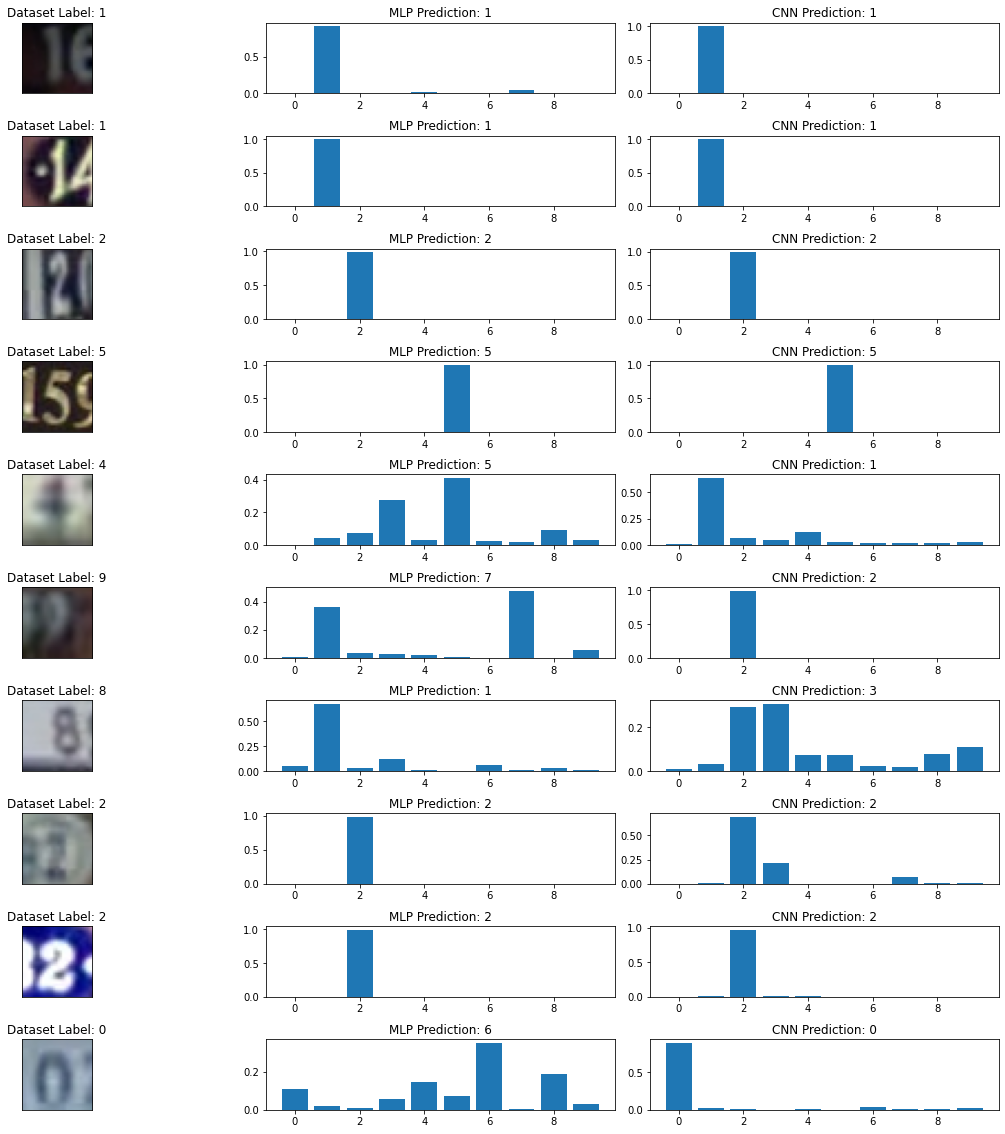

In [119]:
##########################################################################################
fig, axes = plt.subplots(10,3, figsize=(20, 20))
fig.subplots_adjust(hspace=0.6, wspace=0.1)
for cnt in range(0,rnd_list.shape[0]):
  label = y_test[rnd_list[cnt]][0]%10 
  label_CNN = CNN_results[cnt].argmax()
  label_MLP = MLP_results[cnt].argmax()
  axes[cnt,0].imshow(x_test[rnd_list[cnt]])
  axes[cnt,0].set_title(f'Dataset Label: {label}')
  axes[cnt,0].get_xaxis().set_visible(False)
  axes[cnt,0].get_yaxis().set_visible(False)
  axes[cnt,1].bar(range(0,10,1),MLP_results[cnt])
  axes[cnt,1].set_title(f'MLP Prediction: {label_MLP}')
  axes[cnt,2].bar(range(0,10,1),CNN_results[cnt])
  axes[cnt,2].set_title(f'CNN Prediction: {label_CNN}')
plt.show()

In [ ]:
MLP_results

In [ ]:
np.argmax(CNN_results[0])